In [81]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
t = np.array(range(1850,2020))
y0 = [0,300]
def rhs(y, t,kappa,kdeep,gamma_l,gamma_o,c_amp,alpha,beta_l,beta_o,lamb): 
    emis_t = lambda x:x
    F,C = y
    dF = 1/kappa*(6.3*np.log(C/300)-lamb*F)-kdeep*F
    dvdt = [1/kappa*(6.3*np.log(C/300)-lamb*F)-kdeep*F,emis_t(t)-(gamma_l+gamma_o)*dF*(1+F*c_amp)/(1+alpha*(beta_l))-beta_o*(alpha*C)]
    return np.array(dvdt)

In [82]:
mat=1.8e20
alpha=1e6/mat/12*1e15

In [86]:
t = np.array(range(1850,2020))  # the points of evaluation of solution
#r = ode(rhs).set_integrator("dopri5")  # choice of method
y = odeint(rhs,y0,t,args = (9.3,21,-0.13,0.2,1,alpha,1.9,1.6,0.9))

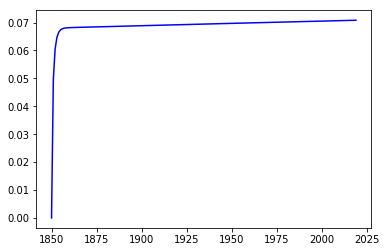

In [87]:
plt.plot(t, y[:, 0], 'b', label='theta(t)')